In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

#check that the data loaded in is in the correct format
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("odata.csv")

df.head()

geotype  AGEfinal  Sex  Race  hhinc2  aindex_cat  dwell_typ1  medaid1  \
0        3        17    2     1       2           2           1        1   
1        1        15    1     1       1           1           1        2   
2        1        15    1     1       1           2           1        2   
3        1        15    2     3       2           2           1        2   
4        1        15    2     1       2           1           1        2   

   agric_animal1  Hunger_cat1  weightloss_attempt  weightgain_attempt  \
0              2            1                   2                   2   
1              2            2                   2                   2   
2              2            3                   2                   1   
3              2            1                   2                   2   
4              2            1                   2                   2   

   SBPfinal  DBPfinal  Cursmoker  Psych_dist2  butterspread  scores_sugar  \
0       132        78          2            2             3             3   
1       124        66          2            2             3             1   
2       128        90          2            2             4             3   
3       110        55          2            2             5             1   
4       116        67          2            1             3             3   

   scores_fruit  NutriKnowA_cat  DDScat1  CategoricalFatScore1  \
0             3               2        1                     1   
1             2               2        1                     2   
2             2               3        1                     1   
3             2               2        1                     2   
4             2               2        2                     1   

   physical_activity  Healthcare_access2yr  famhist_hbp  famhist_diabetes  \
0                  1                     1            2                 2   
1                  2                     1            1                 2   
2                  2                     2            1                 1   
3                  2                     2            1                 1   
4                  1                     2            1                 1   

   famhist_heartdis  redmeat_wfat  milkserv_daily  snack_freq  overweight  \
0                 2             1               5           2           1   
1                 2             1               3           1           1   
2                 2             1               3           2           0   
3                 1             2               5           1           0   
4                 2             1               4           1           1   

   AuditC3_MF1  
0            2  
1            2  
2            2  
3            2  
4            2

In [3]:
df["overweight"].value_counts()

0    525
1    146
Name: overweight, dtype: int64

In [4]:
#print the dimension of the dataset
print("The dataset contains %s rows and %s columns \n"%(df.shape[0],df.shape[1]))

# show the first 10 rows using dataframe.head() method
df.head(4)

The dataset contains 671 rows and 32 columns 



geotype  AGEfinal  Sex  Race  hhinc2  aindex_cat  dwell_typ1  medaid1  \
0        3        17    2     1       2           2           1        1   
1        1        15    1     1       1           1           1        2   
2        1        15    1     1       1           2           1        2   
3        1        15    2     3       2           2           1        2   

   agric_animal1  Hunger_cat1  weightloss_attempt  weightgain_attempt  \
0              2            1                   2                   2   
1              2            2                   2                   2   
2              2            3                   2                   1   
3              2            1                   2                   2   

   SBPfinal  DBPfinal  Cursmoker  Psych_dist2  butterspread  scores_sugar  \
0       132        78          2            2             3             3   
1       124        66          2            2             3             1   
2       128        90          2            2             4             3   
3       110        55          2            2             5             1   

   scores_fruit  NutriKnowA_cat  DDScat1  CategoricalFatScore1  \
0             3               2        1                     1   
1             2               2        1                     2   
2             2               3        1                     1   
3             2               2        1                     2   

   physical_activity  Healthcare_access2yr  famhist_hbp  famhist_diabetes  \
0                  1                     1            2                 2   
1                  2                     1            1                 2   
2                  2                     2            1                 1   
3                  2                     2            1                 1   

   famhist_heartdis  redmeat_wfat  milkserv_daily  snack_freq  overweight  \
0                 2             1               5           2           1   
1                 2             1               3           1           1   
2                 2             1               3           2           0   
3                 1             2               5           1           0   

   AuditC3_MF1  
0            2  
1            2  
2            2  
3            2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   geotype               671 non-null    int64
 1   AGEfinal              671 non-null    int64
 2   Sex                   671 non-null    int64
 3   Race                  671 non-null    int64
 4   hhinc2                671 non-null    int64
 5   aindex_cat            671 non-null    int64
 6   dwell_typ1            671 non-null    int64
 7   medaid1               671 non-null    int64
 8   agric_animal1         671 non-null    int64
 9   Hunger_cat1           671 non-null    int64
 10  weightloss_attempt    671 non-null    int64
 11  weightgain_attempt    671 non-null    int64
 12  SBPfinal              671 non-null    int64
 13  DBPfinal              671 non-null    int64
 14  Cursmoker             671 non-null    int64
 15  Psych_dist2           671 non-null    int64
 16  buttersp

In [6]:
#get the number of missing values in each column of the dataset
missing_count = df.isna().sum().sort_values(ascending=False)
print(missing_count)

geotype                 0
AGEfinal                0
overweight              0
snack_freq              0
milkserv_daily          0
redmeat_wfat            0
famhist_heartdis        0
famhist_diabetes        0
famhist_hbp             0
Healthcare_access2yr    0
physical_activity       0
CategoricalFatScore1    0
DDScat1                 0
NutriKnowA_cat          0
scores_fruit            0
scores_sugar            0
butterspread            0
Psych_dist2             0
Cursmoker               0
DBPfinal                0
SBPfinal                0
weightgain_attempt      0
weightloss_attempt      0
Hunger_cat1             0
agric_animal1           0
medaid1                 0
dwell_typ1              0
aindex_cat              0
hhinc2                  0
Race                    0
Sex                     0
AuditC3_MF1             0
dtype: int64


In [7]:
# check for duplicate records

df.duplicated().sum()

0

In [8]:
df.describe().T  #T transposes the resulting dataframe

count        mean        std   min    25%    50%    75%  \
geotype               671.0    2.156483   1.122743   1.0    1.0    2.0    3.0   
AGEfinal              671.0   16.004471   0.854301  15.0   15.0   16.0   17.0   
Sex                   671.0    1.558867   0.496893   1.0    1.0    2.0    2.0   
Race                  671.0    1.529061   0.924931   1.0    1.0    1.0    2.0   
hhinc2                671.0    2.183308   1.039843   1.0    1.0    2.0    3.0   
aindex_cat            671.0    1.591654   0.757168   1.0    1.0    1.0    2.0   
dwell_typ1            671.0    1.204173   0.403397   1.0    1.0    1.0    1.0   
medaid1               671.0    1.885246   0.318963   1.0    2.0    2.0    2.0   
agric_animal1         671.0    1.941878   0.234149   1.0    2.0    2.0    2.0   
Hunger_cat1           671.0    2.010432   0.878369   1.0    1.0    2.0    3.0   
weightloss_attempt    671.0    1.874814   0.331177   1.0    2.0    2.0    2.0   
weightgain_attempt    671.0    1.856930   0.350405   1.0    2.0    2.0    2.0   
SBPfinal              671.0  116.478390  12.108061  70.0  108.0  116.0  124.0   
DBPfinal              671.0   65.107303   8.809957  45.0   59.0   64.0   71.0   
Cursmoker             671.0    1.962742   0.189534   1.0    2.0    2.0    2.0   
Psych_dist2           671.0    1.900149   0.300025   1.0    2.0    2.0    2.0   
butterspread          671.0    2.880775   1.109297   1.0    2.0    3.0    4.0   
scores_sugar          671.0    1.888227   0.761594   1.0    1.0    2.0    2.0   
scores_fruit          671.0    1.889717   0.734887   1.0    1.0    2.0    2.0   
NutriKnowA_cat        671.0    2.041729   0.552918   1.0    2.0    2.0    2.0   
DDScat1               671.0    1.427720   0.495117   1.0    1.0    1.0    2.0   
CategoricalFatScore1  671.0    1.555887   0.497238   1.0    1.0    2.0    2.0   
physical_activity     671.0    1.745156   0.436098   1.0    1.0    2.0    2.0   
Healthcare_access2yr  671.0    1.673621   0.469237   1.0    1.0    2.0    2.0   
famhist_hbp           671.0    1.770492   0.420830   1.0    2.0    2.0    2.0   
famhist_diabetes      671.0    1.800298   0.400075   1.0    2.0    2.0    2.0   
famhist_heartdis      671.0    1.953800   0.210074   1.0    2.0    2.0    2.0   
redmeat_wfat          671.0    1.320417   0.466985   1.0    1.0    1.0    2.0   
milkserv_daily        671.0    2.785395   1.373033   1.0    1.0    3.0    4.0   
snack_freq            671.0    1.627422   0.483852   1.0    1.0    2.0    2.0   
overweight            671.0    0.217586   0.412912   0.0    0.0    0.0    0.0   
AuditC3_MF1           671.0    1.931446   0.252883   1.0    2.0    2.0    2.0   

                        max  
geotype                 4.0  
AGEfinal               17.0  
Sex                     2.0  
Race                    4.0  
hhinc2                  4.0  
aindex_cat              4.0  
dwell_typ1              2.0  
medaid1                 2.0  
agric_animal1           2.0  
Hunger_cat1             3.0  
weightloss_attempt      2.0  
weightgain_attempt      2.0  
SBPfinal              180.0  
DBPfinal              102.0  
Cursmoker               2.0  
Psych_dist2             2.0  
butterspread            5.0  
scores_sugar            3.0  
scores_fruit            3.0  
NutriKnowA_cat          3.0  
DDScat1                 2.0  
CategoricalFatScore1    2.0  
physical_activity       2.0  
Healthcare_access2yr    2.0  
famhist_hbp             2.0  
famhist_diabetes        2.0  
famhist_heartdis        2.0  
redmeat_wfat            2.0  
milkserv_daily          5.0  
snack_freq              2.0  
overweight              1.0  
AuditC3_MF1             2.0

(0.0, 100.0)

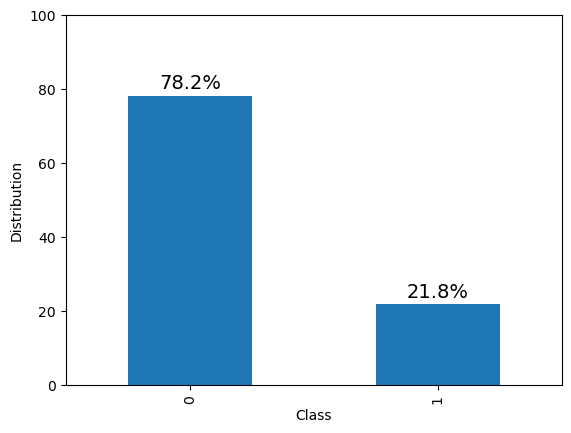

In [9]:
#To check our target variable

ax = df["overweight"].value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=14)

# Add x and y axis titles
ax.set_xlabel("Class")
ax.set_ylabel("Distribution")
ax.set_ylim(0,100)
    
# Remove y axis
#ax.get_yaxis().set_visible(False)

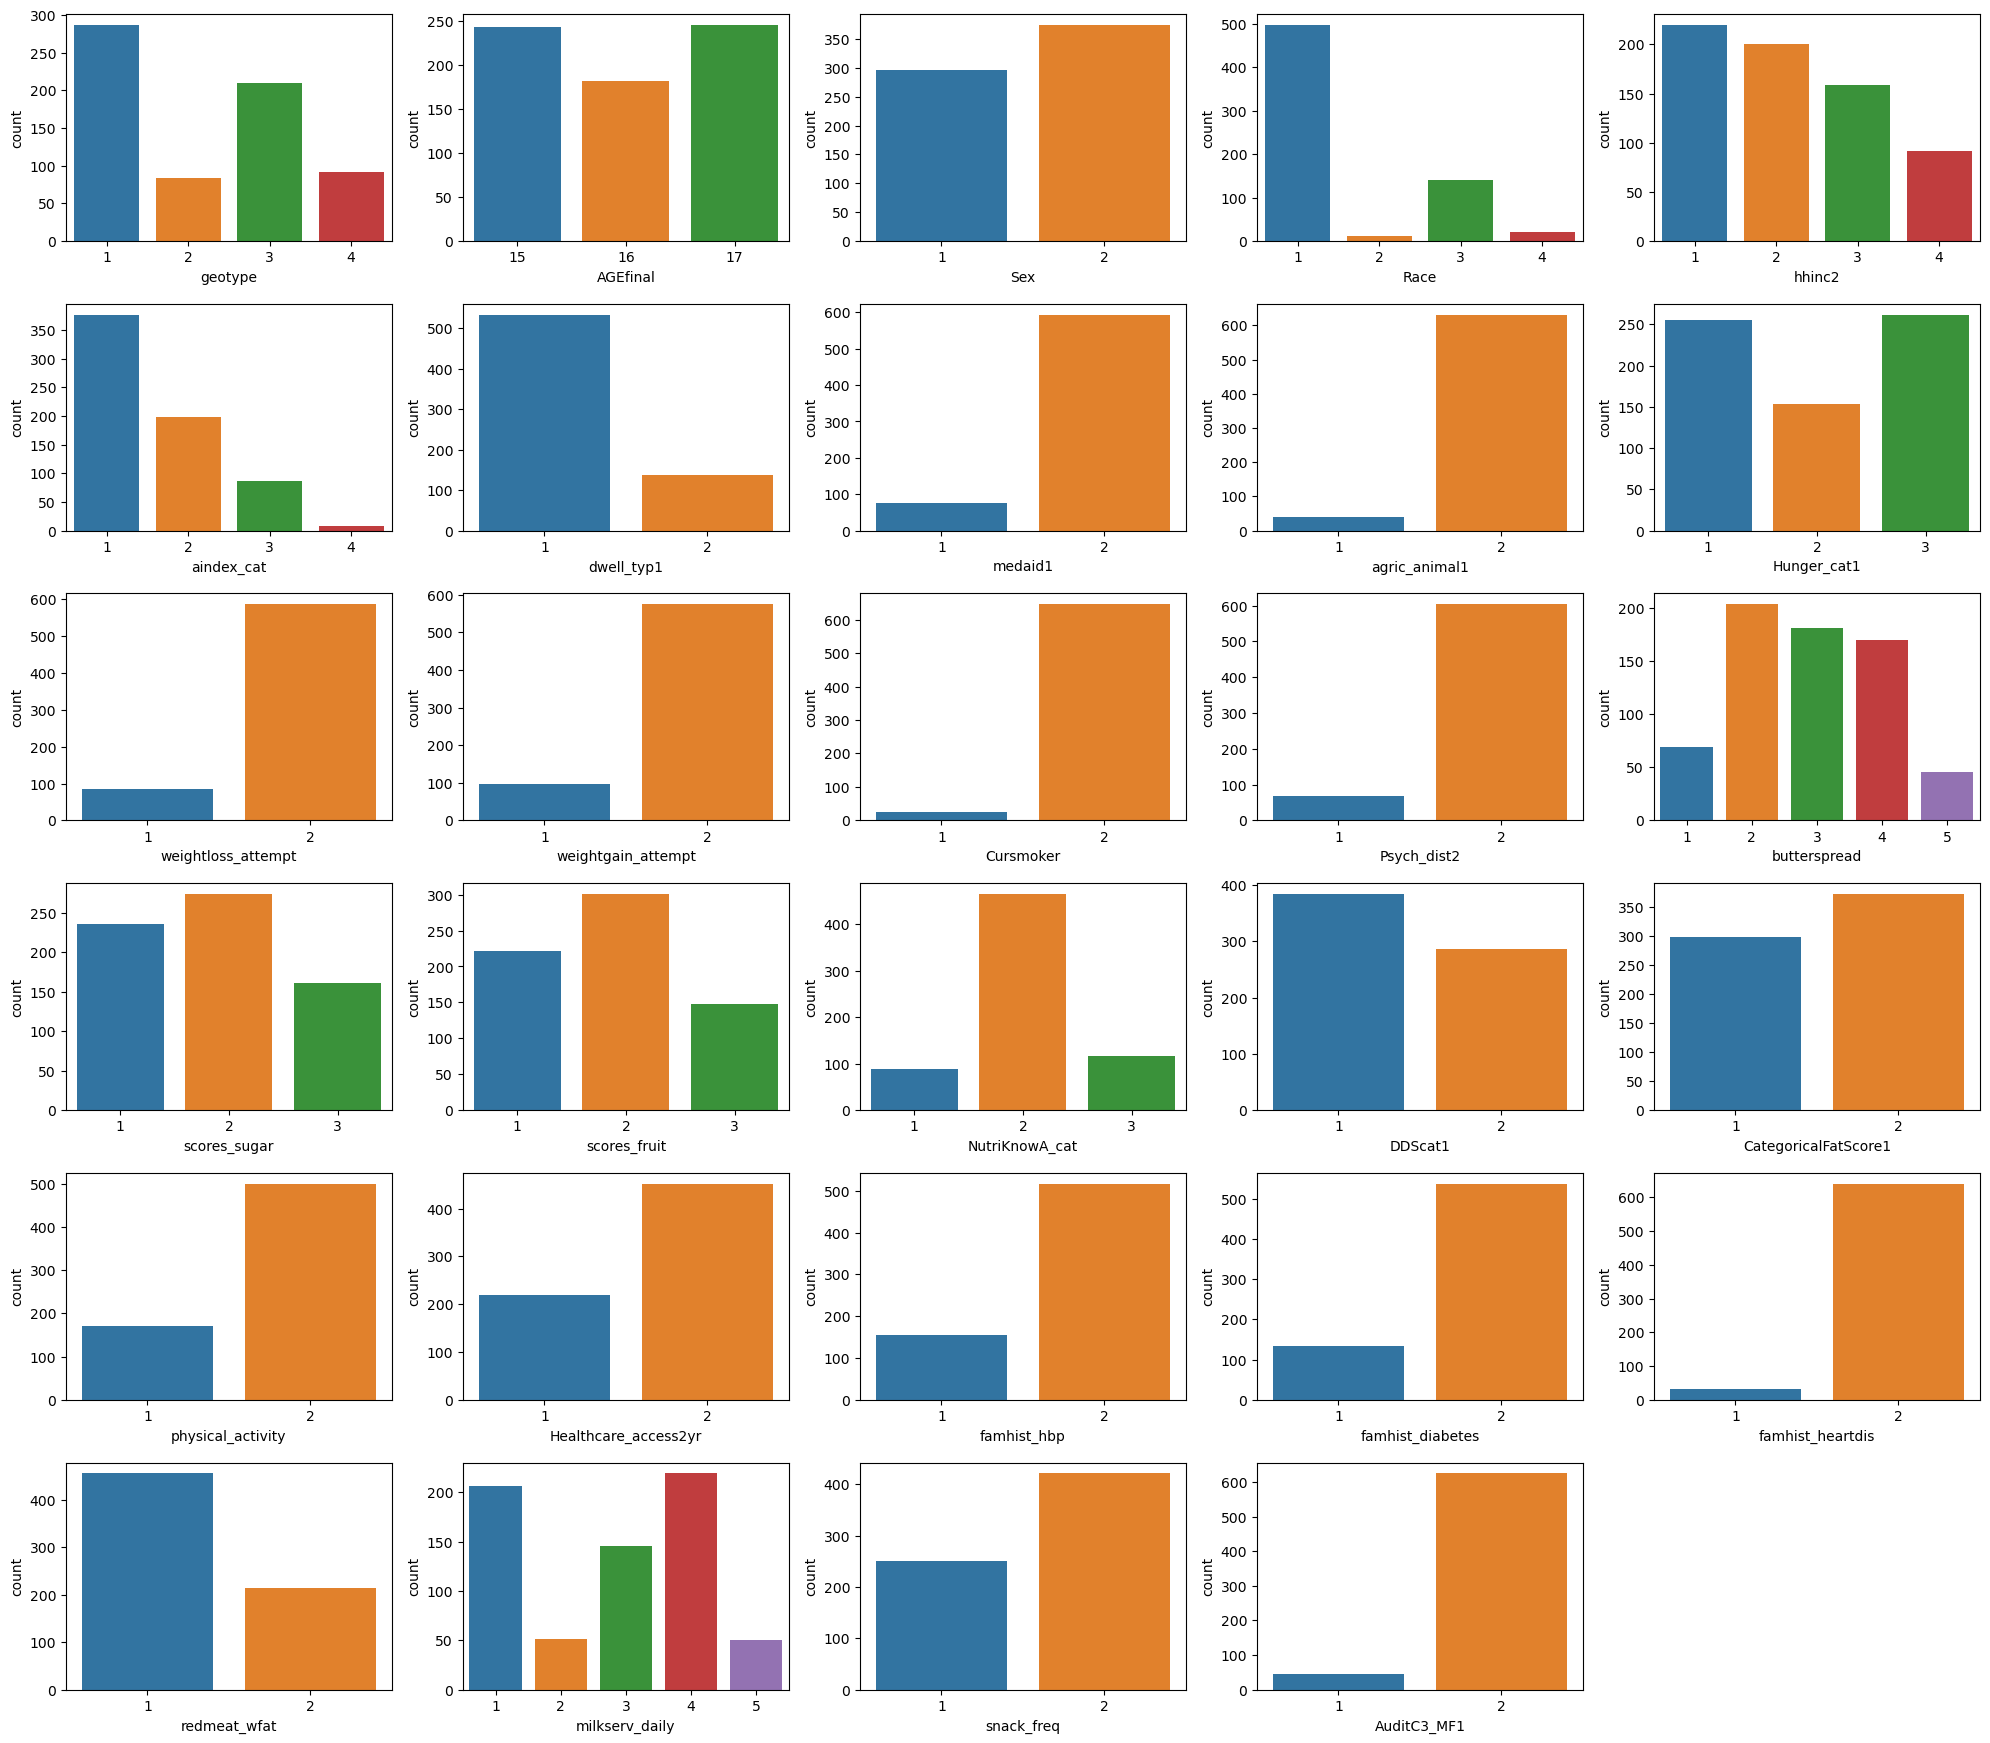

In [10]:
fig = plt.figure(figsize=(20,20))

for i, col in enumerate(df.drop(columns=["overweight", "DBPfinal", "SBPfinal"], axis =1).columns.to_list()):
    ax1 = fig.add_subplot(7, 5, i+1)
    sns.countplot(x=col, data=df, ax=ax1)

plt.tight_layout()

fig.savefig('univariate_plots.jpeg')
plt.show()

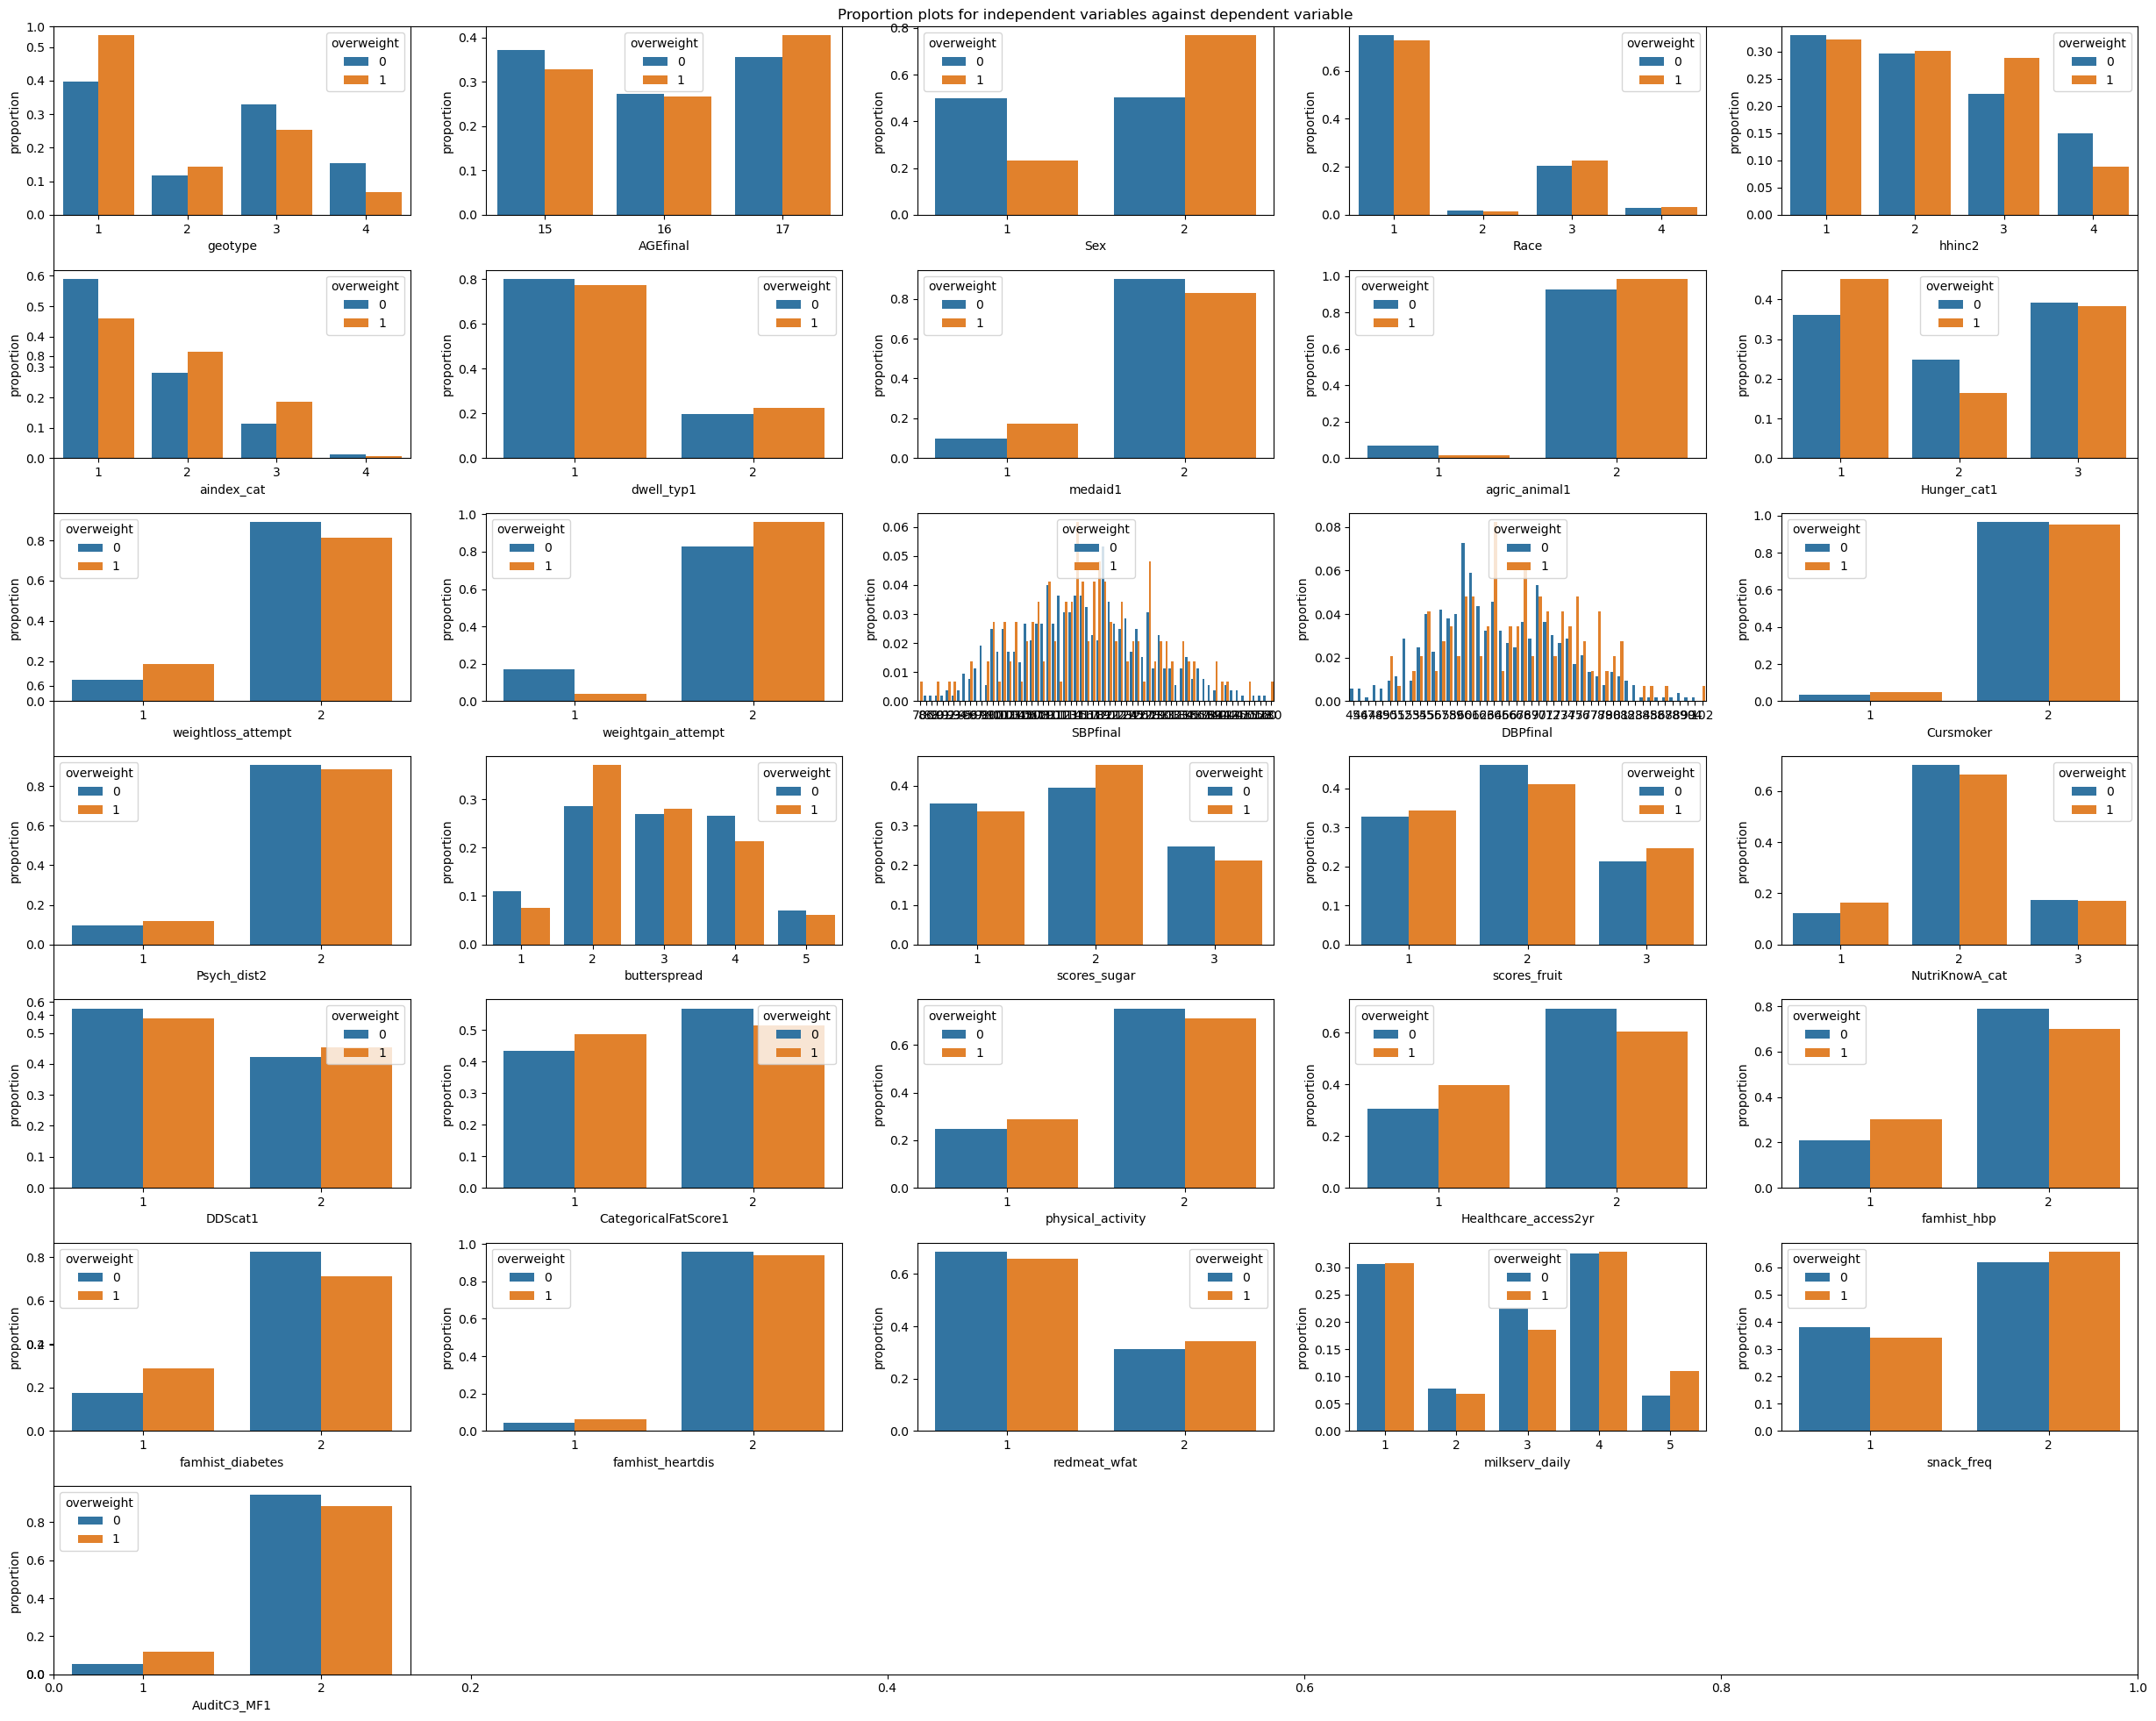

In [11]:
fig = plt.figure(figsize=(25,20))

plt.title("Proportion plots for independent variables against dependent variable")

for i, col in enumerate(df.drop(columns="overweight").columns.to_list()):
    ax1 = fig.add_subplot(7, 5, i+1)
    x, y, hue = col, "proportion", "overweight"
    (df[x]
     .groupby(df[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ax=ax1))

plt.tight_layout()
fig.savefig('bivariate.jpeg')
plt.show()

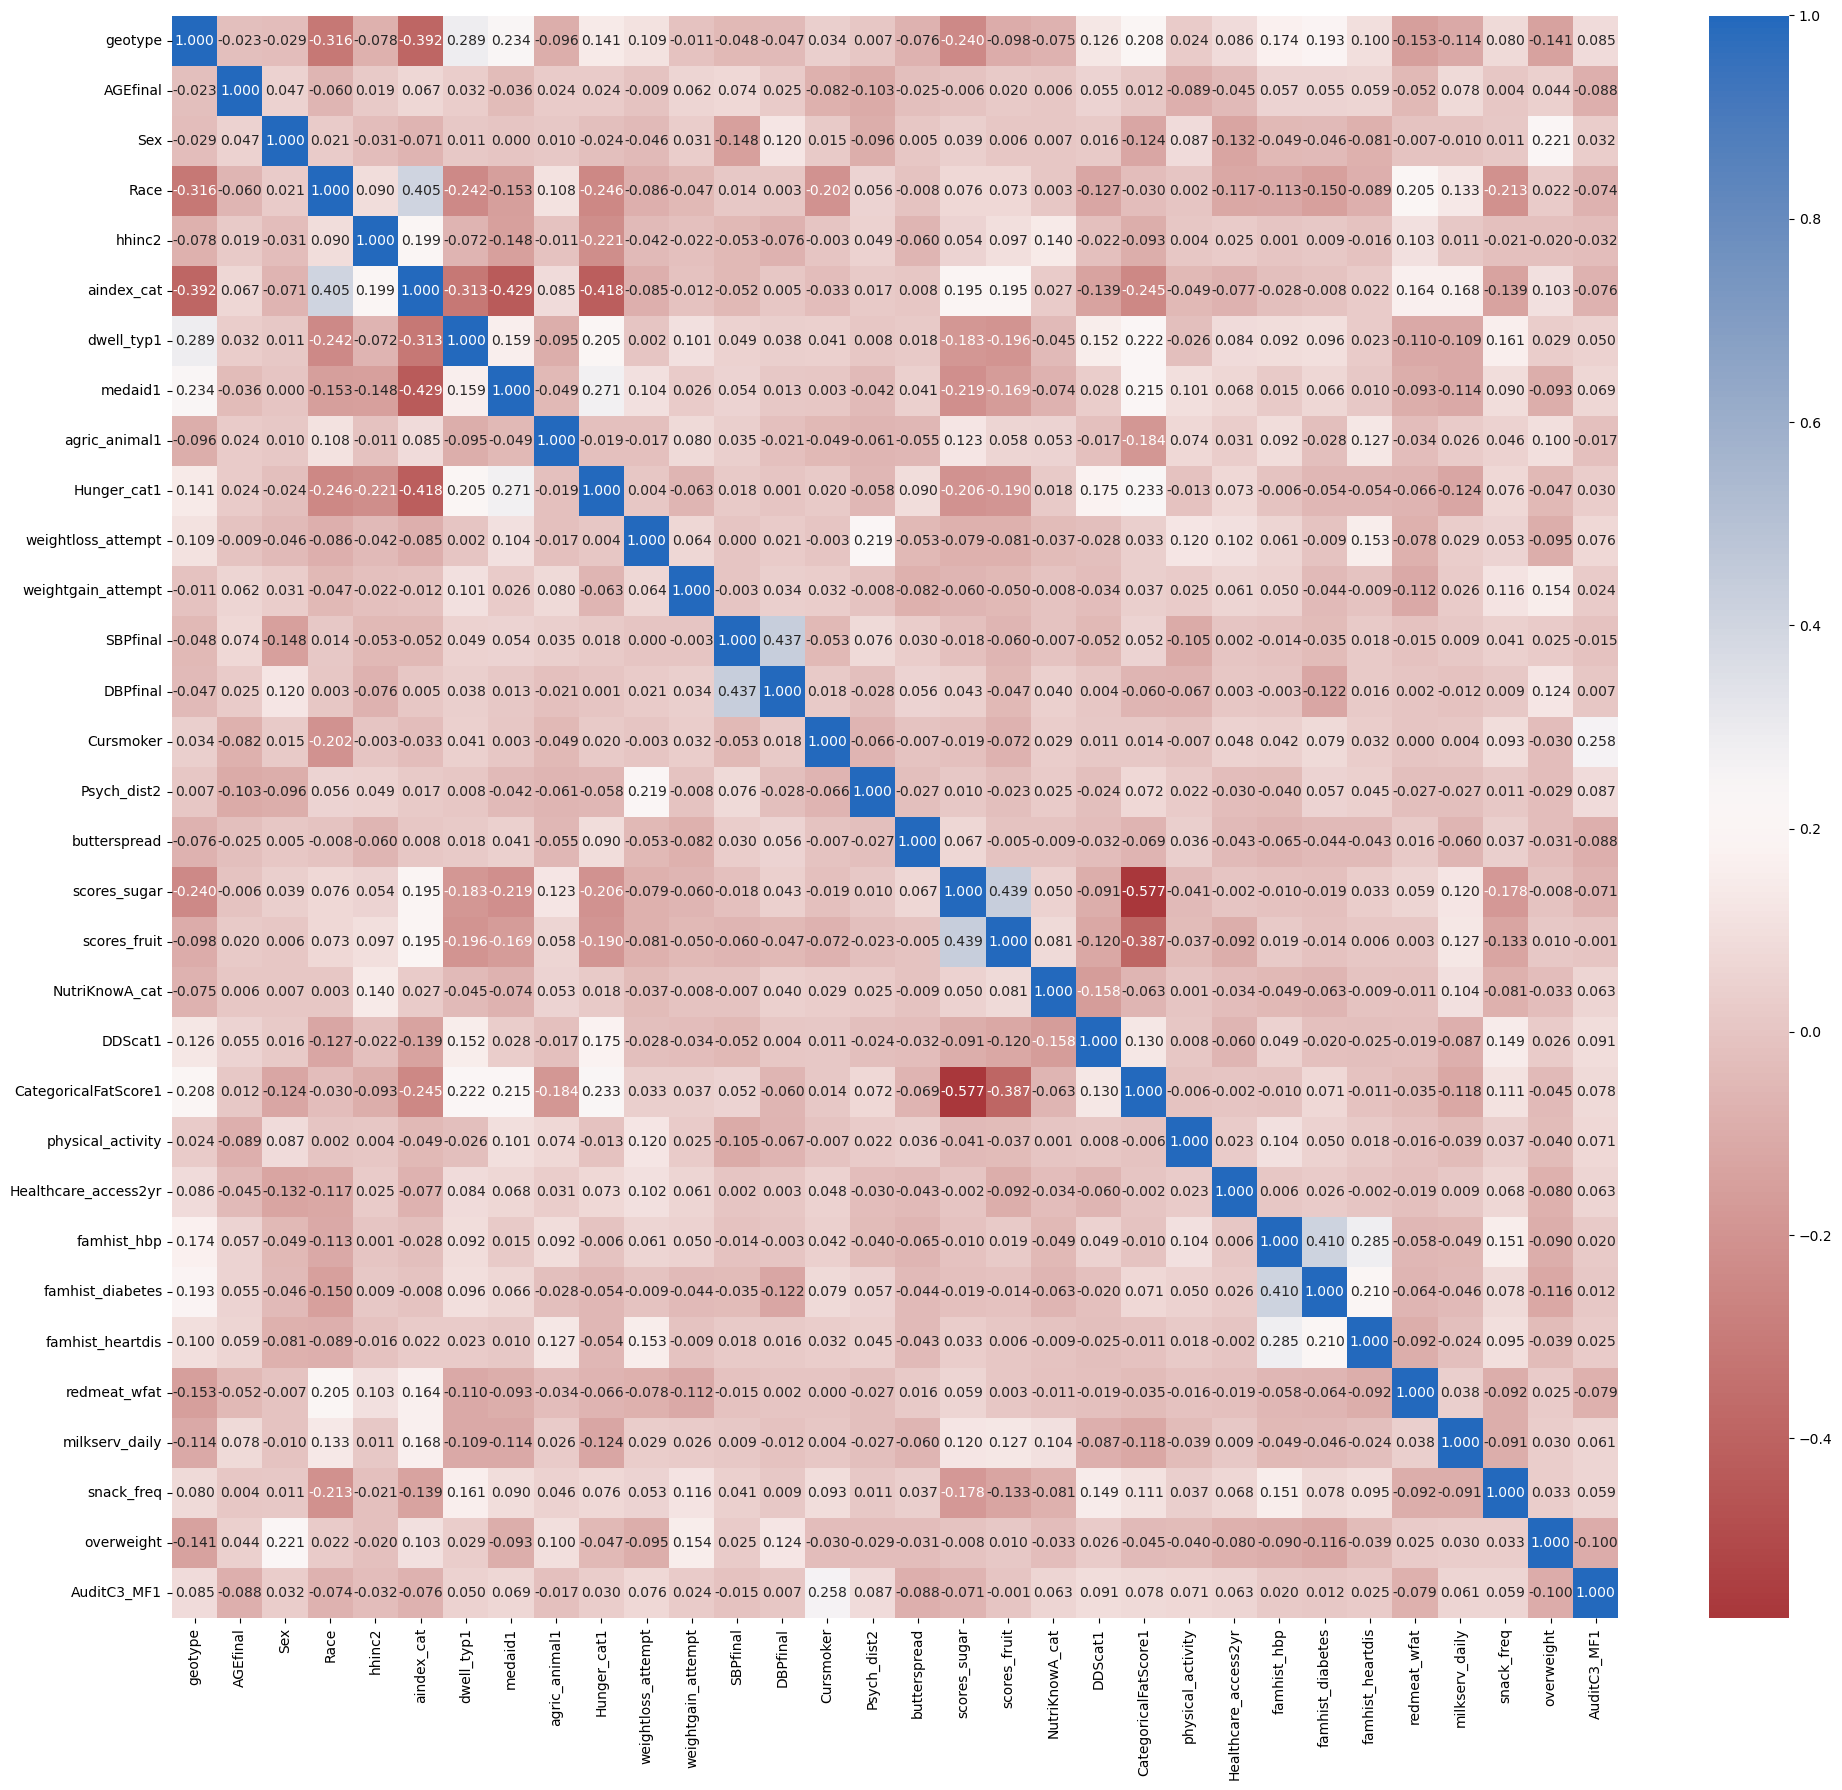

In [12]:
# correlation plot
plt.figure(figsize = [20, 18])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r')
plt.tight_layout()
plt.savefig('multi.jpeg') # save the plot
plt.show()

In [13]:
# Let’s create a copy so we can play with it without harming the original dataset
clean_df = df.copy()

clean_df.head(n=4)

geotype  AGEfinal  Sex  Race  hhinc2  aindex_cat  dwell_typ1  medaid1  \
0        3        17    2     1       2           2           1        1   
1        1        15    1     1       1           1           1        2   
2        1        15    1     1       1           2           1        2   
3        1        15    2     3       2           2           1        2   

   agric_animal1  Hunger_cat1  weightloss_attempt  weightgain_attempt  \
0              2            1                   2                   2   
1              2            2                   2                   2   
2              2            3                   2                   1   
3              2            1                   2                   2   

   SBPfinal  DBPfinal  Cursmoker  Psych_dist2  butterspread  scores_sugar  \
0       132        78          2            2             3             3   
1       124        66          2            2             3             1   
2       128        90          2            2             4             3   
3       110        55          2            2             5             1   

   scores_fruit  NutriKnowA_cat  DDScat1  CategoricalFatScore1  \
0             3               2        1                     1   
1             2               2        1                     2   
2             2               3        1                     1   
3             2               2        1                     2   

   physical_activity  Healthcare_access2yr  famhist_hbp  famhist_diabetes  \
0                  1                     1            2                 2   
1                  2                     1            1                 2   
2                  2                     2            1                 1   
3                  2                     2            1                 1   

   famhist_heartdis  redmeat_wfat  milkserv_daily  snack_freq  overweight  \
0                 2             1               5           2           1   
1                 2             1               3           1           1   
2                 2             1               3           2           0   
3                 1             2               5           1           0   

   AuditC3_MF1  
0            2  
1            2  
2            2  
3            2

In [14]:
X = df.drop(["overweight"], axis = 1)
y = df["overweight"]

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [16]:
y.value_counts()

1    525
0    525
Name: overweight, dtype: int64

(0.0, 60.0)

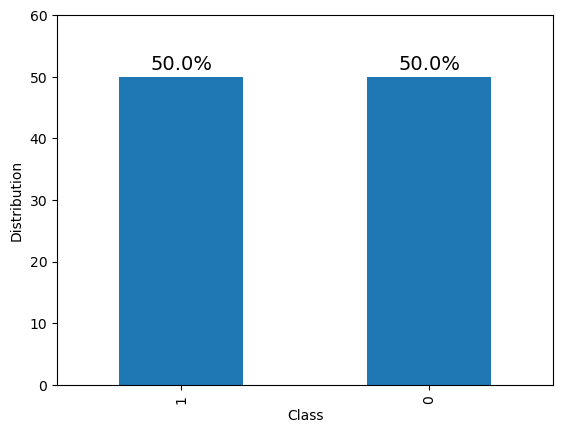

In [48]:
#To check our target variable

ax = y.value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y_h = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y_h)

    # Annotate plot
    ax.annotate(label, xy=(x, y_h), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=14)

# Add x and y axis titles
ax.set_xlabel("Class")
ax.set_ylabel("Distribution")
ax.set_ylim(0,60)      

# Remove y axis
#ax.get_yaxis().set_visible(False)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, stratify = y, test_size = 0.3)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

rfe_method = RFE(DecisionTreeClassifier(random_state=10), n_features_to_select = 16)
rfe_method.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(random_state=10), n_features_to_select=16)

In [20]:
new_cols = X_train.columns[(rfe_method.get_support())]
new_cols

Index(['geotype', 'AGEfinal', 'Race', 'aindex_cat', 'Hunger_cat1', 'SBPfinal',
       'DBPfinal', 'butterspread', 'scores_sugar', 'CategoricalFatScore1',
       'physical_activity', 'Healthcare_access2yr', 'famhist_diabetes',
       'redmeat_wfat', 'milkserv_daily', 'AuditC3_MF1'],
      dtype='object')

In [21]:
X_train = X_train[new_cols]
X_test = X_test[new_cols]

In [22]:
X_test.shape

(315, 16)

In [23]:
# make a copy of X_train
X_train_scaled = X_train.copy()

# make a copy of X_test
X_test_scaled = X_test.copy()

In [24]:
scaler = StandardScaler()
scaler.fit(X_train_scaled)

X_train_scaled[X_train_scaled.columns] = scaler.transform(X_train)
X_train_scaled.head()

geotype  AGEfinal      Race  aindex_cat  Hunger_cat1  SBPfinal  \
353 -0.922374  1.314162 -0.544857    0.667904    -1.040998  0.296054   
247 -0.922374  0.088389 -0.544857    0.667904     1.274081  0.456172   
693 -0.922374  0.088389 -0.544857    2.086717    -1.040998  0.936525   
884 -0.922374  0.088389 -0.544857   -0.750909     1.274081  0.135937   
830  0.987329 -1.137384 -0.544857   -0.750909     0.116541 -1.145005   

     DBPfinal  butterspread  scores_sugar  CategoricalFatScore1  \
353  1.678071      0.263020      0.318051             -0.863622   
247 -0.672347      2.177080     -1.065190             -0.863622   
693  1.678071      0.263020     -1.065190             -0.863622   
884  1.325508     -0.694009     -1.065190             -0.863622   
830 -0.907389     -0.694009      0.318051             -0.863622   

     physical_activity  Healthcare_access2yr  famhist_diabetes  redmeat_wfat  \
353           0.689858              0.868433          0.666339     -0.561113   
247           0.689858             -1.151499         -1.500737     -0.561113   
693          -1.449574             -1.151499         -1.500737     -0.561113   
884           0.689858              0.868433         -1.500737     -0.561113   
830           0.689858             -1.151499          0.666339     -0.561113   

     milkserv_daily  AuditC3_MF1  
353        0.213531     0.339597  
247       -1.310211     0.339597  
693        0.975402    -2.944665  
884        0.213531     0.339597  
830        0.975402     0.339597

In [25]:
X_test_scaled[X_test_scaled.columns] = scaler.transform(X_test)
X_test_scaled.head()

geotype  AGEfinal      Race  aindex_cat  Hunger_cat1  SBPfinal  \
903  -0.922374  0.088389 -0.544857    0.667904    -1.040998 -1.225064   
1016 -0.922374  1.314162 -0.544857   -0.750909     0.116541  0.055878   
944  -0.922374 -1.137384  3.020156    2.086717    -1.040998  0.296054   
801  -0.922374 -1.137384 -0.544857   -0.750909     0.116541 -1.305123   
87   -0.922374  1.314162 -0.544857   -0.750909     0.116541  2.057349   

      DBPfinal  butterspread  scores_sugar  CategoricalFatScore1  \
903  -0.202264      0.263020      0.318051             -0.863622   
1016 -0.554827     -0.694009      1.701293             -0.863622   
944  -0.084743     -1.651039     -1.065190              1.157914   
801  -1.024910      0.263020      0.318051             -0.863622   
87    1.090466      0.263020      1.701293              1.157914   

      physical_activity  Healthcare_access2yr  famhist_diabetes  redmeat_wfat  \
903            0.689858             -1.151499          0.666339     -0.561113   
1016          -1.449574             -1.151499         -1.500737     -0.561113   
944           -1.449574              0.868433          0.666339      1.782172   
801           -1.449574              0.868433         -1.500737     -0.561113   
87            -1.449574              0.868433         -1.500737     -0.561113   

      milkserv_daily  AuditC3_MF1  
903        -1.310211     0.339597  
1016        0.975402     0.339597  
944         0.975402     0.339597  
801        -1.310211     0.339597  
87          0.975402     0.339597

In [26]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import  ConfusionMatrixDisplay

In [27]:
all_scores_dict = {} # scores for all models

In [28]:
def evaluate_model(actual_target, pred, data_type= "TEST"):
    """
    This function returns the evaluation metrics of a model on the test set
    
    params:
        actual_target: actual target for the test set
        pred: predicted target for the test 
    """
    

    class_report = metrics.classification_report(actual_target,pred, target_names=['0', '1'])
    conf_mat = metrics.confusion_matrix(y_true=actual_target, y_pred=pred)
    
    
    #acc_score = metrics.accuracy_score(actual_target,pred)
    prec = metrics.precision_score(actual_target,pred)
    sensitivity = metrics.recall_score(actual_target,pred)
    specificity = metrics.recall_score(actual_target,pred, pos_label=0)
    bal_acc = metrics.balanced_accuracy_score(actual_target, pred)
    f1_score = metrics.f1_score(actual_target,pred)
    mcc = matthews_corrcoef(actual_target,pred)
    kappa = cohen_kappa_score(actual_target,pred)
    #roc = roc_auc_score(actual_target, pred_proba)
    
    print(f"\n=========================={data_type}=====================================")    
    print("confusion matrix: \n", conf_mat)
    #print("\nAccuracy: %.3f"%(acc_score))
    print("Precision: %.3f"%(prec))
    print("Sensitivity/recall: %.3f"%(sensitivity))
    print("Specificity: %.3f"%(specificity))
    print("Balanced Accuracy: %.3f"%(bal_acc))
    print("F1 score: %.3f"%(f1_score))
    print("MCC: %.3f"%(mcc))
    print("kappa: %.3f"%(kappa))
    print("Classification report: \n",class_report)
    
    return [bal_acc, prec, sensitivity, specificity, f1_score, kappa, mcc], conf_mat


def plot_confusion_matrix_heatmap(conf_mat, plot_name):
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set_title('Confusion Matrix')
    plt.savefig(plot_name + ".jpeg")
    plt.show()

In [29]:
#With gini as default criterion
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_scaled, y_train)


# evaluate test set/Generalization scores and add to the score dataframe
dt_test_pred = dt.predict(X_test_scaled)
#ypred_prob = dtree_model.predict_proba(X_test_scaled)[:, 1]

all_scores_dict['Gini'], dt_cm = evaluate_model(y_test, dt_test_pred,'TEST')


==========================TEST=====================================
confusion matrix: 
 [[109  49]
 [ 34 123]]
Precision: 0.715
Sensitivity/recall: 0.783
Specificity: 0.690
Balanced Accuracy: 0.737
F1 score: 0.748
MCC: 0.475
kappa: 0.473
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       158
           1       0.72      0.78      0.75       157

    accuracy                           0.74       315
   macro avg       0.74      0.74      0.74       315
weighted avg       0.74      0.74      0.74       315



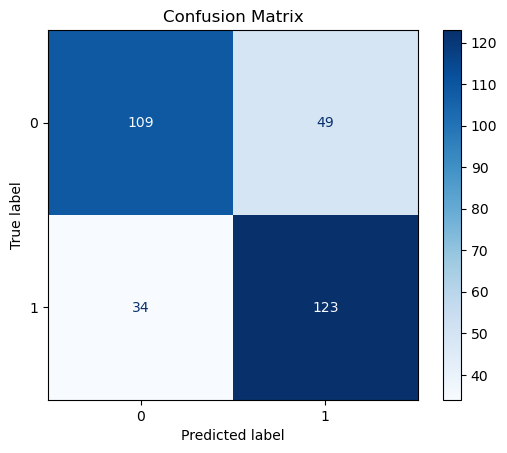

In [30]:
plot_confusion_matrix_heatmap(dt_cm, "fDecision tree_Gini")

In [31]:
feature_cols = X_train_scaled.columns.tolist()

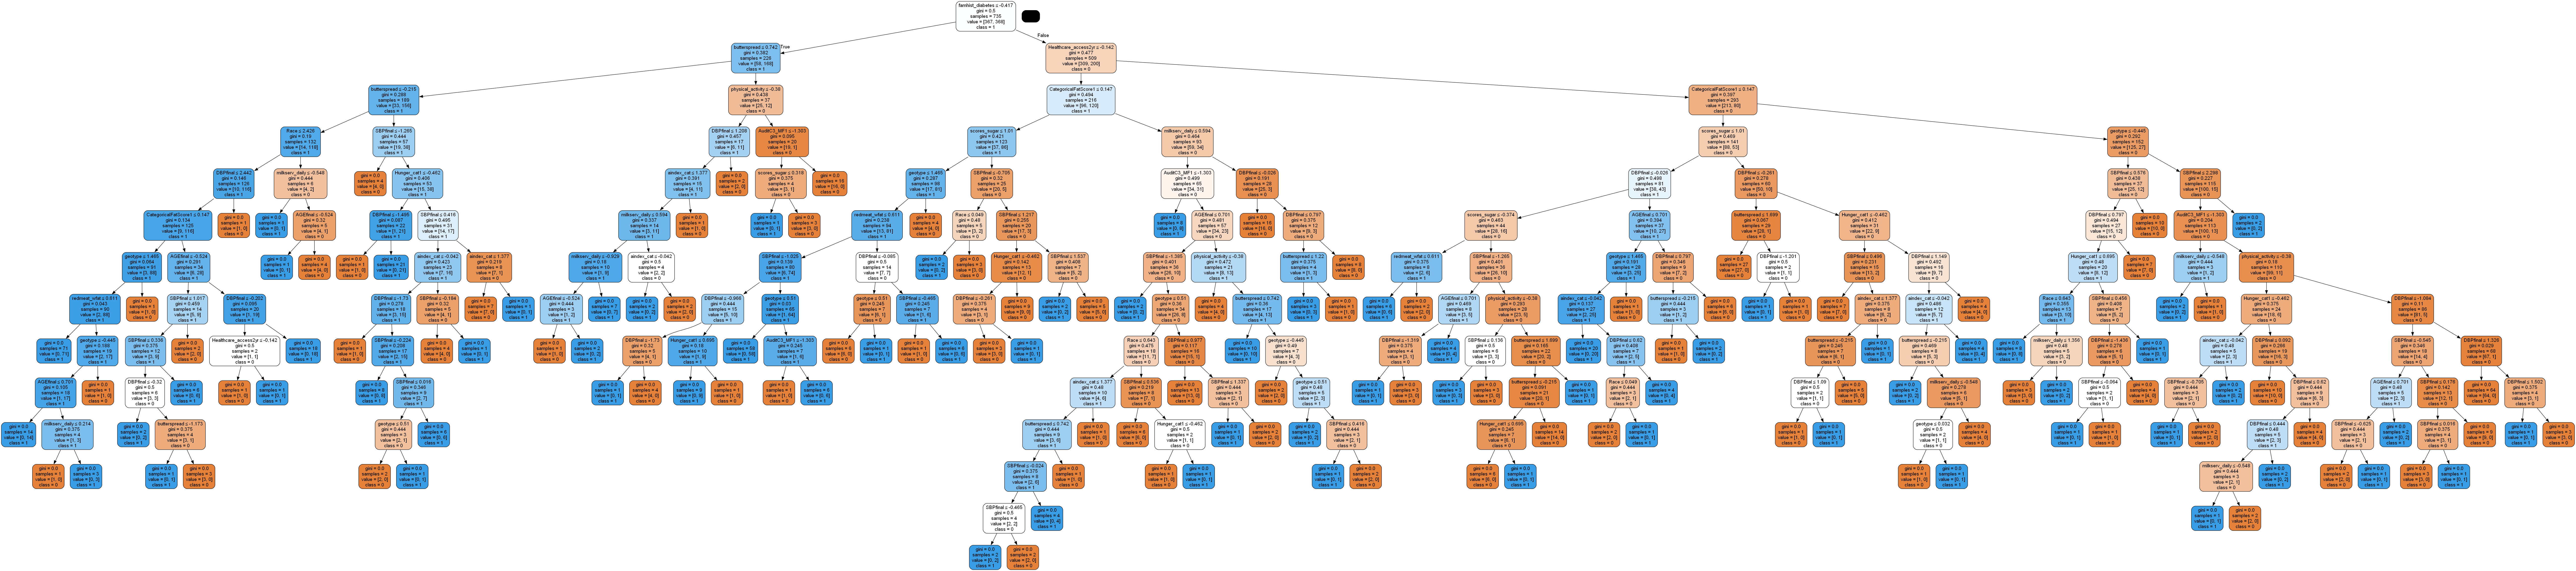

In [32]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fdec_tree_gini.png')
Image(graph.create_png())

In [33]:
# with gini and max depth 7
dt_tun = DecisionTreeClassifier(max_depth = 7, random_state = 42)
dt_tun.fit(X_train_scaled, y_train)


# evaluate test set/Generalization scores and add to the score dataframe
dt_test_pred_tun = dt_tun.predict(X_test_scaled)
#ypred_prob = dtree_model.predict_proba(X_test_scaled)[:, 1]

all_scores_dict['Gini (Max_depth = 7)'], dt_tun_cm = evaluate_model(y_test, dt_test_pred_tun,'TEST')


==========================TEST=====================================
confusion matrix: 
 [[108  50]
 [ 40 117]]
Precision: 0.701
Sensitivity/recall: 0.745
Specificity: 0.684
Balanced Accuracy: 0.714
F1 score: 0.722
MCC: 0.430
kappa: 0.429
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.68      0.71       158
           1       0.70      0.75      0.72       157

    accuracy                           0.71       315
   macro avg       0.72      0.71      0.71       315
weighted avg       0.72      0.71      0.71       315



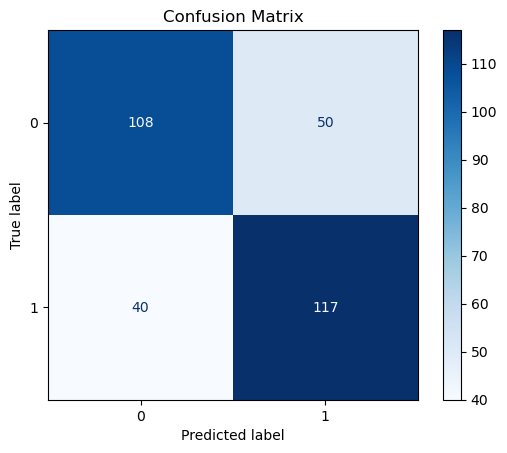

In [34]:
plot_confusion_matrix_heatmap(dt_tun_cm, "fDecision tree_Gini (Max_depth7)")

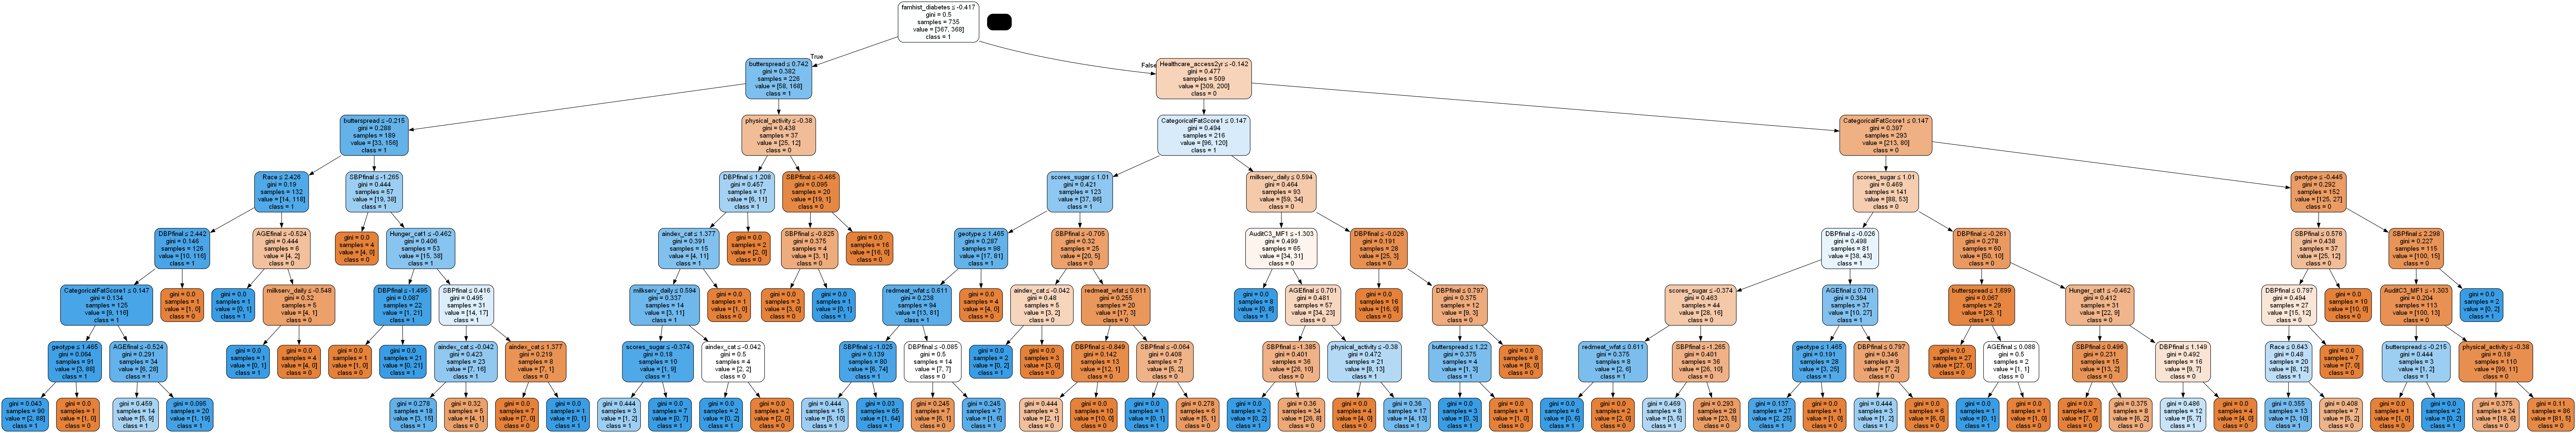

In [35]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_tun, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fdec_tree_gini7.png')
Image(graph.create_png())

In [36]:
# with entropy
dt_ent = DecisionTreeClassifier(criterion = "entropy", random_state = 42)
dt_ent.fit(X_train_scaled, y_train)

# evaluate test set/Generalization scores and add to the score dataframe
dt_test_pred_ent = dt_ent.predict(X_test_scaled)
#ypred_prob = dtree_model.predict_proba(X_test_scaled)[:, 1]

all_scores_dict['Entropy'], dt_ent_cm = evaluate_model(y_test, dt_test_pred_ent,'TEST')


==========================TEST=====================================
confusion matrix: 
 [[114  44]
 [ 28 129]]
Precision: 0.746
Sensitivity/recall: 0.822
Specificity: 0.722
Balanced Accuracy: 0.772
F1 score: 0.782
MCC: 0.546
kappa: 0.543
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       158
           1       0.75      0.82      0.78       157

    accuracy                           0.77       315
   macro avg       0.77      0.77      0.77       315
weighted avg       0.77      0.77      0.77       315



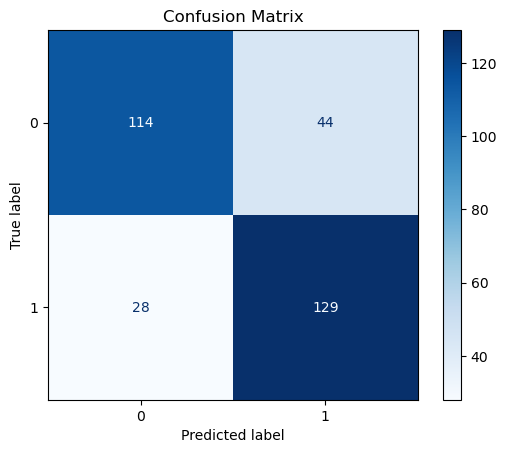

In [37]:
plot_confusion_matrix_heatmap(dt_ent_cm, "fDecision tree_ent")

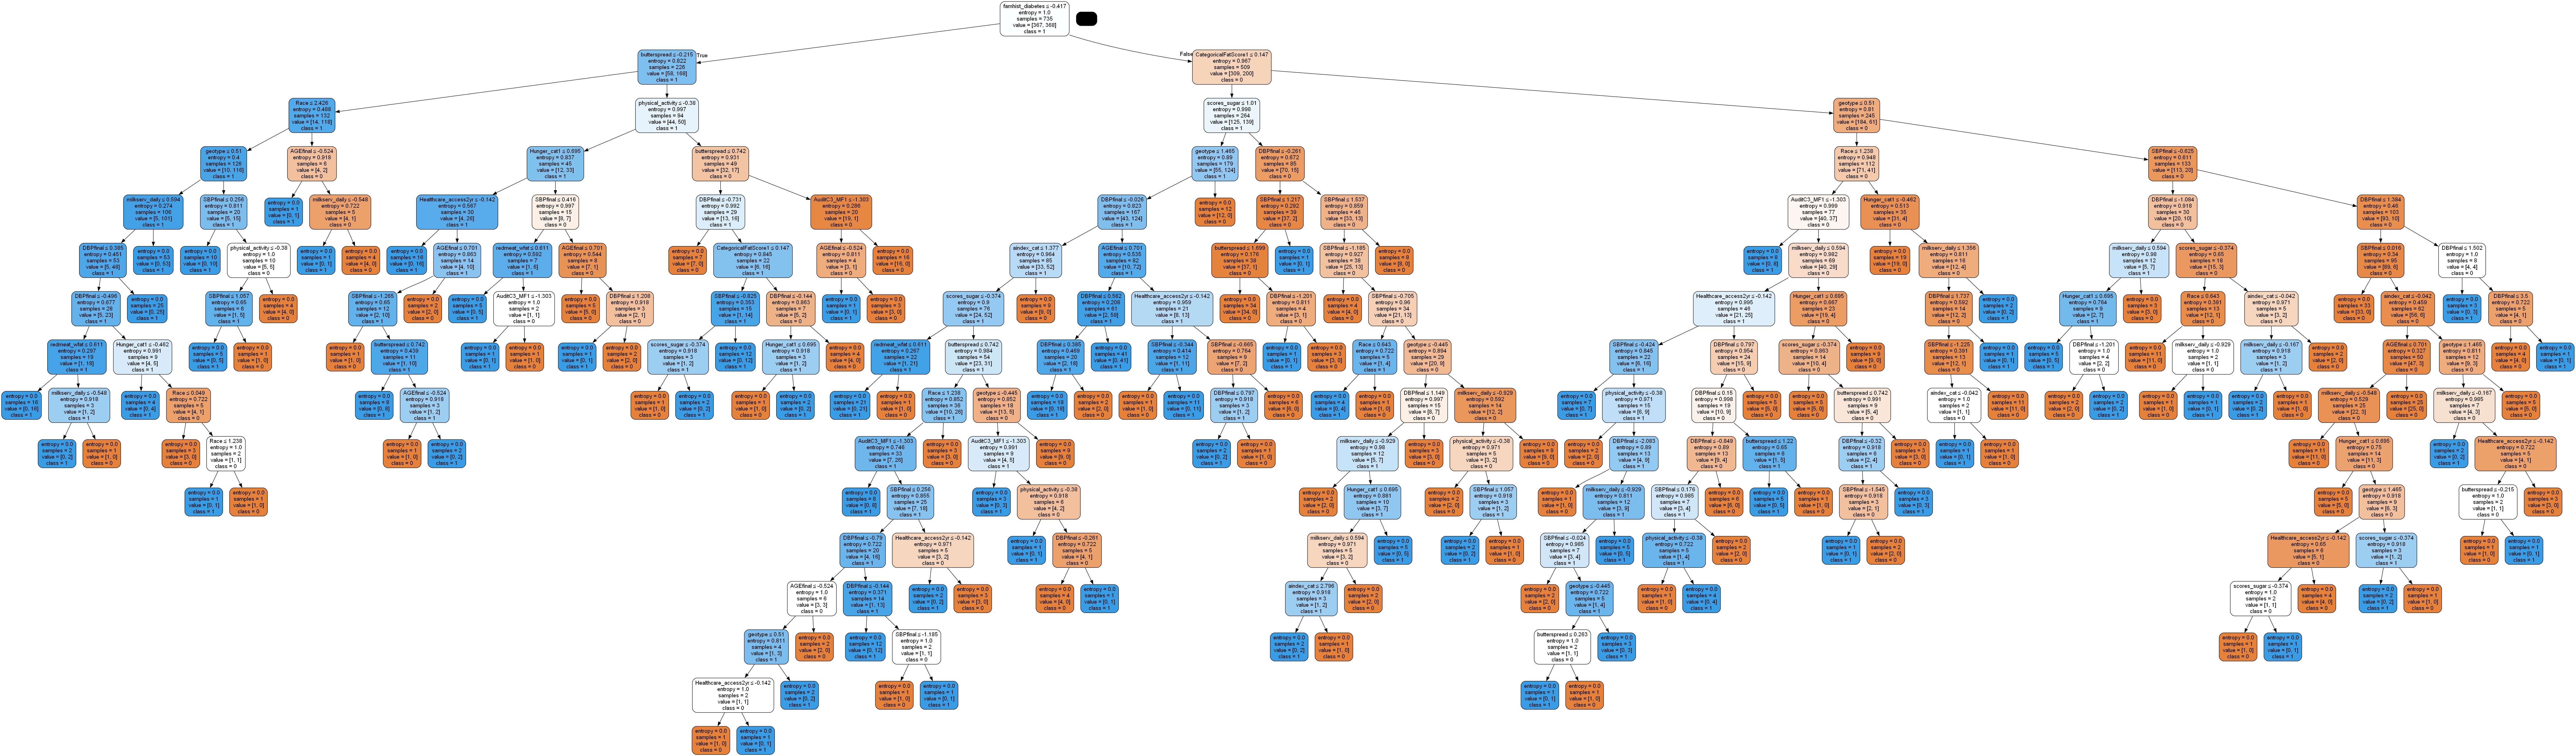

In [38]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_ent, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fdec_tree_ent.png')
Image(graph.create_png())

In [39]:
# with entropy
dt_ent_tun = DecisionTreeClassifier(max_depth = 7, criterion = "entropy", random_state = 42)
dt_ent_tun.fit(X_train_scaled, y_train)


# evaluate test set/Generalization scores and add to the score dataframe
dt_test_pred_ent_tun = dt_ent_tun.predict(X_test_scaled)
#ypred_prob = dtree_model.predict_proba(X_test_scaled)[:, 1]

all_scores_dict['Entropy (Max_depth = 7)'], dt_ent_tun_cm = evaluate_model(y_test, dt_test_pred_ent_tun,'TEST')


==========================TEST=====================================
confusion matrix: 
 [[115  43]
 [ 34 123]]
Precision: 0.741
Sensitivity/recall: 0.783
Specificity: 0.728
Balanced Accuracy: 0.756
F1 score: 0.762
MCC: 0.512
kappa: 0.511
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75       158
           1       0.74      0.78      0.76       157

    accuracy                           0.76       315
   macro avg       0.76      0.76      0.76       315
weighted avg       0.76      0.76      0.76       315



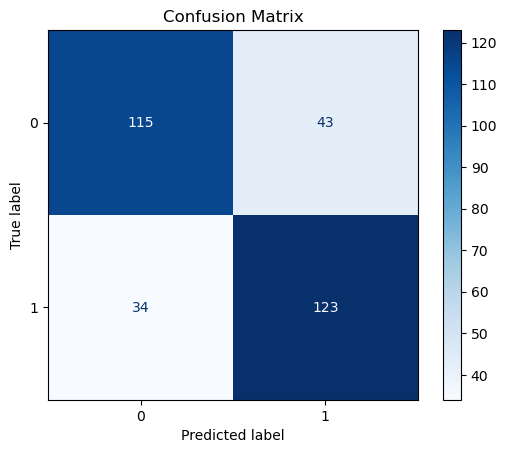

In [40]:
plot_confusion_matrix_heatmap(dt_ent_tun_cm, "fDecision tree_entropy (Max_depth = 7)")

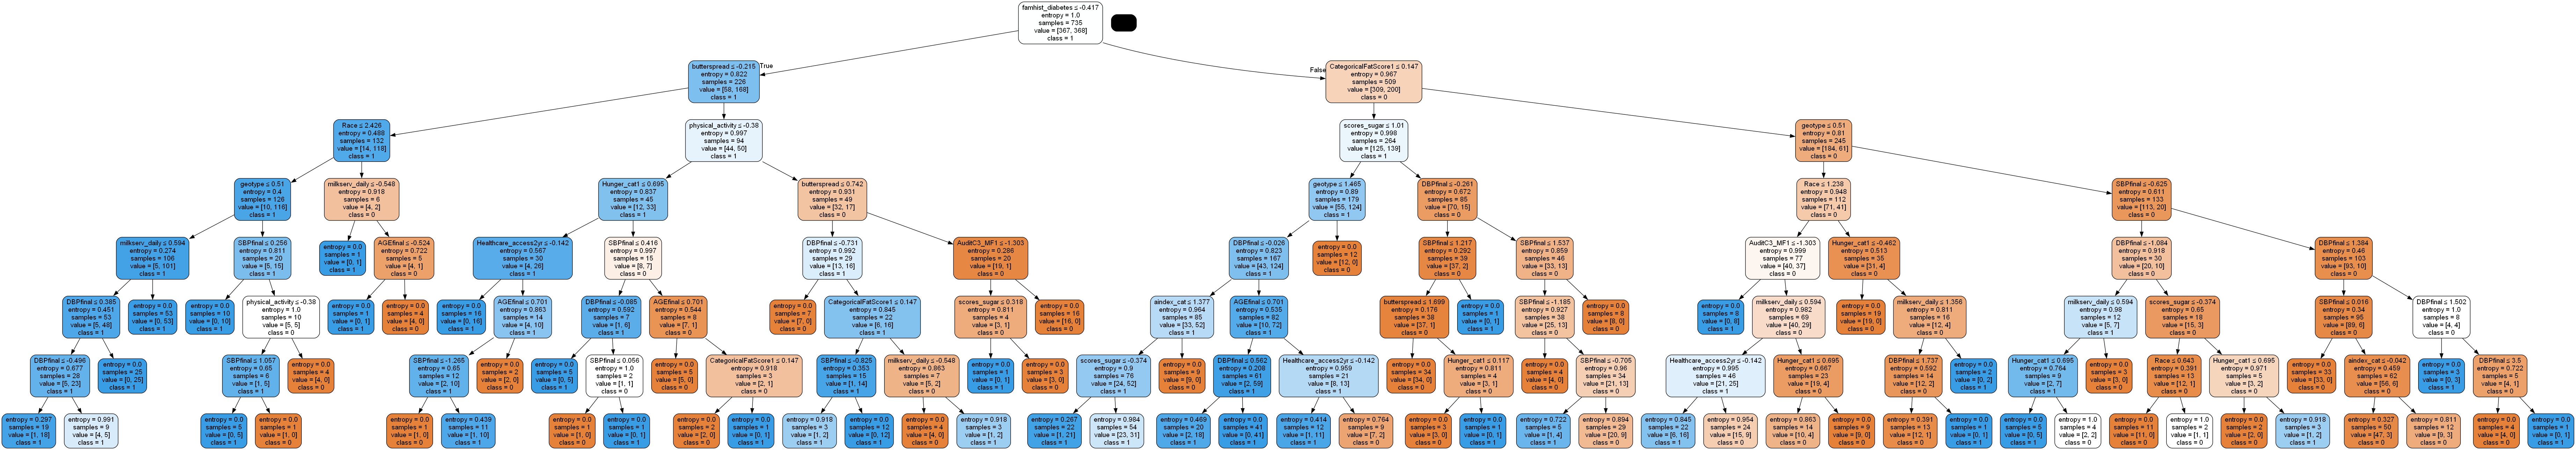

In [41]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_ent_tun, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fdec_tree_ent7.png')
Image(graph.create_png())

In [42]:
#all_scores_dict

In [43]:
metrics_label = ['Balanced Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1_Score', 'Cohen_Kappa', 'MCC']
score_df = pd.DataFrame(all_scores_dict, index = metrics_label).T.round(3)

In [44]:
score_df

Balanced Accuracy  Precision  Sensitivity  \
Gini                                 0.737      0.715        0.783   
Gini (Max_depth = 7)                 0.714      0.701        0.745   
Entropy                              0.772      0.746        0.822   
Entropy (Max_depth = 7)              0.756      0.741        0.783   

                         Specificity  F1_Score  Cohen_Kappa    MCC  
Gini                           0.690     0.748        0.473  0.475  
Gini (Max_depth = 7)           0.684     0.722        0.429  0.430  
Entropy                        0.722     0.782        0.543  0.546  
Entropy (Max_depth = 7)        0.728     0.762        0.511  0.512

In [45]:
score_df.to_csv("Upsampling_With_Feature_Selection.csv", index=True)

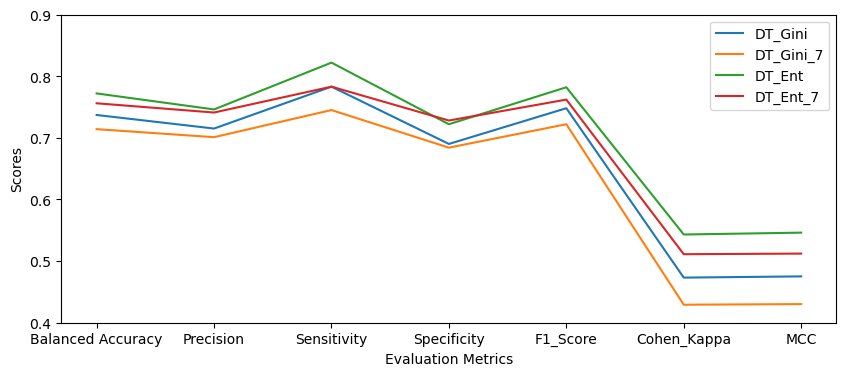

In [46]:
fig, ax = plt.subplots(figsize=(10, 4))

plt.plot(score_df.T['Gini'], label = 'DT_Gini')
plt.plot(score_df.T['Gini (Max_depth = 7)'], label = 'DT_Gini_7')
plt.plot(score_df.T['Entropy'], label = 'DT_Ent')
plt.plot(score_df.T['Entropy (Max_depth = 7)'], label = 'DT_Ent_7')

# Add labels and title
plt.xlabel('Evaluation Metrics')
plt.ylabel('Scores')
#plt.title('Voting Evaluation Metrics the First Set')

plt.ylim(0.4, 0.9)

plt.legend(loc = 'upper right')

# Show the plot
plt.savefig("upsampling_withfeature_selection.png")
plt.show()

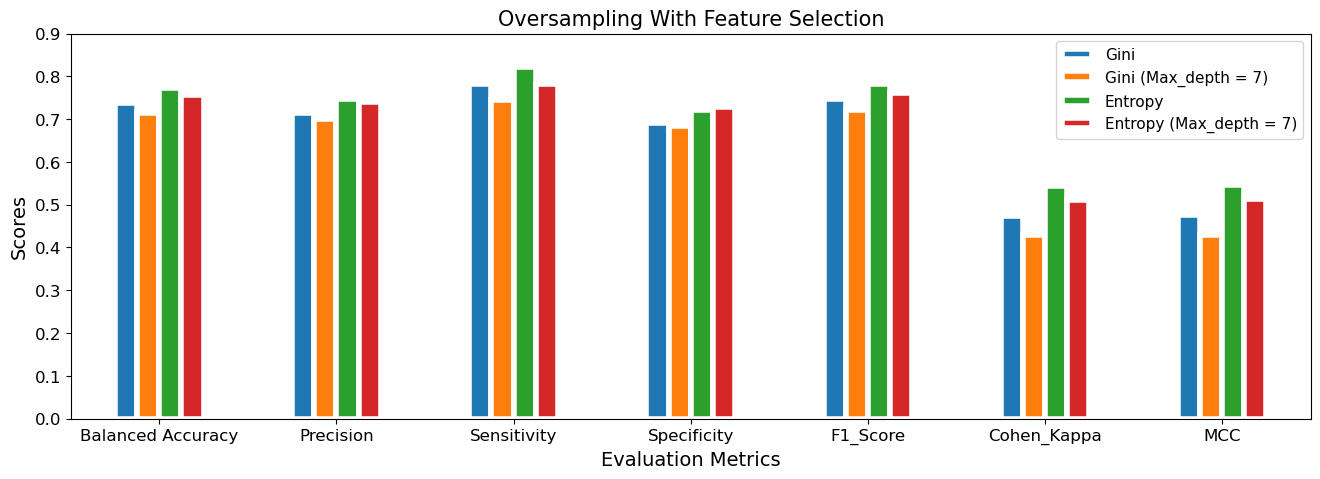

In [47]:
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(111)
plt.ylim(0, 0.9)
plt.title("Oversampling With Feature Selection", size = 15)
plt.xlabel("Evaluation Metrics", fontsize = 14)
plt.ylabel("Scores", fontsize = 14)
plt.yticks(fontsize = 12)

score_df.T.plot.bar(ax = ax, linewidth = 4, edgecolor = 'white');
plt.legend(loc = 'upper right', ncol = 1, fontsize = 11);
plt.xticks(fontsize = 12, rotation = 0);
plt.savefig("BarchartUpsamplingWith")

Comments
- Implement different pruning strategies
- Implement with multiple class classification